In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import missingno as msno

In [2]:
file_path = r'C:\Users\zara8\Capstone_project_2\Raw_Data\amz_us_price_prediction_dataset.csv'


In [3]:
raw_df=pd.read_csv(file_path, index_col=["uid"])

In [4]:
raw_df.shape

(1735414, 8)

In [5]:
raw_df.dtypes

asin                  object
title                 object
stars                float64
reviews                int64
price                float64
category              object
isBestSeller            bool
boughtInLastMonth      int64
dtype: object

In [6]:
raw_df.head()

,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
uid,,,,,,,,
1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
4,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
5,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


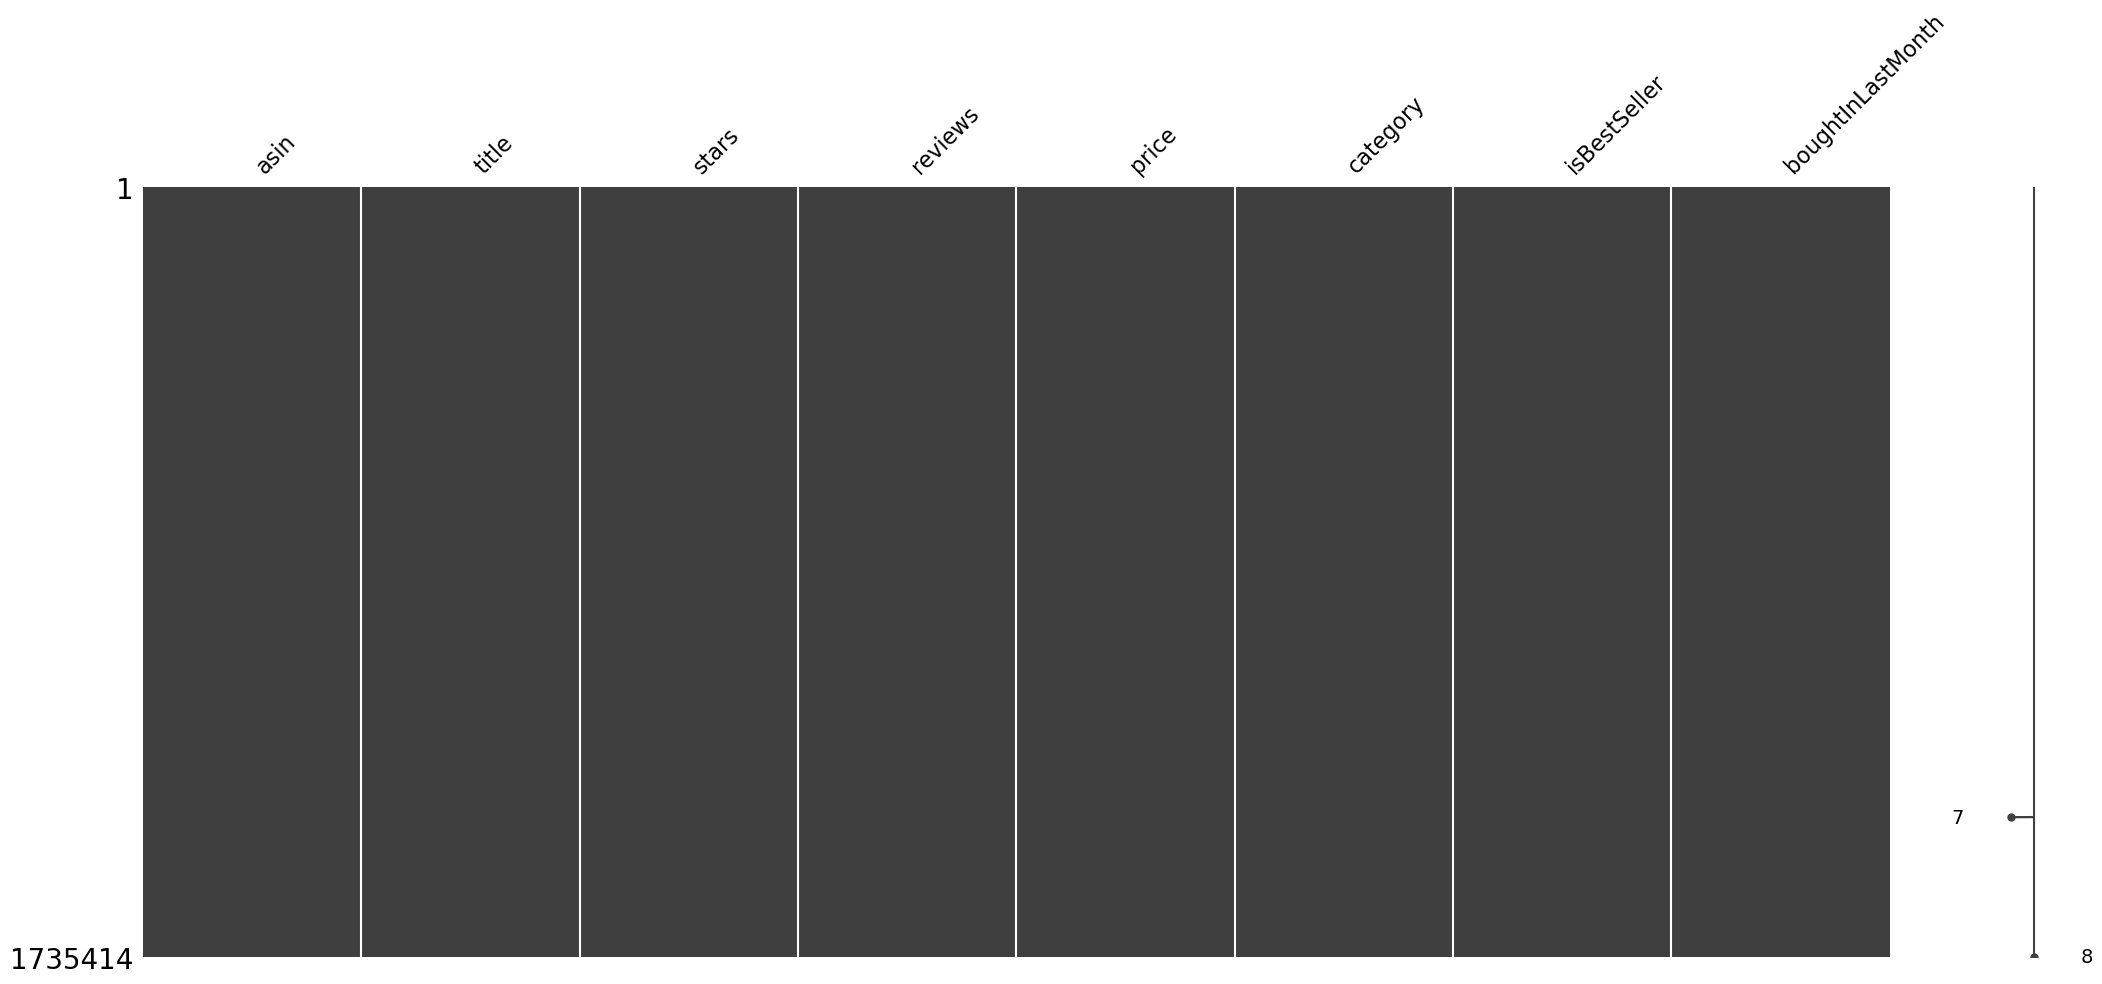

In [7]:
msno.matrix(raw_df)
plt.show()

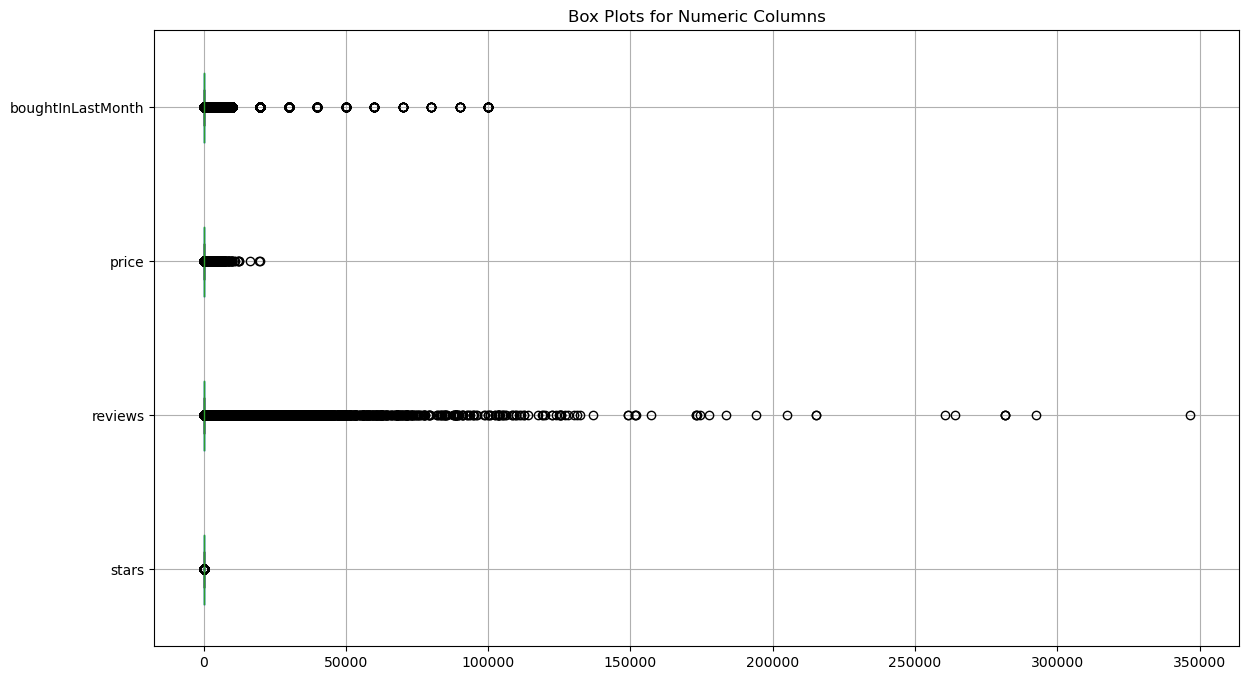

In [8]:
# Finding outliers
numeric_columns = ['stars', 'reviews', 'price', 'boughtInLastMonth']


plt.figure(figsize=(14, 8))
raw_df[numeric_columns].boxplot(sym='o', vert=False)
plt.title('Box Plots for Numeric Columns')
plt.show()


In [9]:
# Display the count of null values in each column
null_counts = raw_df.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
asin                 0
title                1
stars                0
reviews              0
price                0
category             0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


In [10]:
# Display the rows with null values in the 'title' column
print(raw_df[raw_df['title'].isnull()])

               asin title  stars  reviews  price  category  isBestSeller  \
uid                                                                        
1819752  B00758A9CE   NaN    5.0        0  33.08  Car Care         False   

         boughtInLastMonth  
uid                         
1819752                  0  


There is only one row in the dataset where the 'title' column has a null value. All other columns in that row have valid data. This row is uid= '1819752' 

In [11]:

raw_df.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'category',
       'isBestSeller', 'boughtInLastMonth'],
      dtype='object')

In [12]:
raw_df["stars"].unique()

array([4.5, 4.6, 4.4, 4.7, 4.3, 3.9, 4.2, 4.1, 4.8, 4. , 3.7, 2. , 0. ,
       5. , 3.4, 3.3, 3.8, 3.1, 1.5, 2.8, 4.9, 3.6, 3.2, 3.5, 1. , 3. ,
       2.6, 2.3, 2.7, 2.9, 2.5, 2.4, 2.2, 1.9, 2.1, 1.4, 1.7, 1.8, 1.3,
       1.6, 1.2])

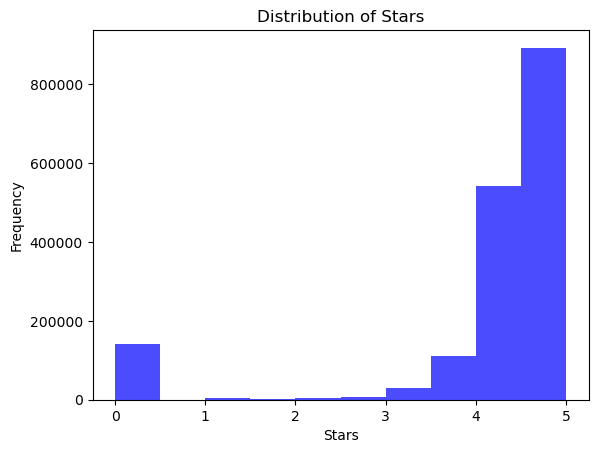

In [13]:
# Check outlier for the 'stars' column
plt.hist(raw_df['stars'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars')
plt.show()

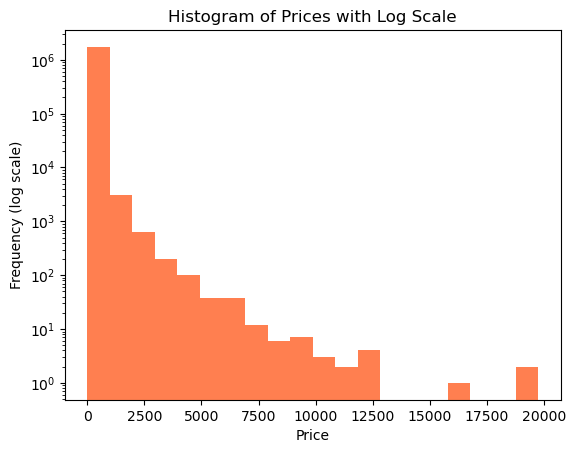

In [14]:
# Plot histogram with log scale on the y-axis
plt.hist(raw_df['price'], bins=20, color='coral')
plt.yscale('log')  # Use log scale on the y-axis
plt.xlabel('Price')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Prices with Log Scale')
plt.show()

In [15]:
raw_df["reviews"].unique()

array([    0, 27918, 47104, ..., 17264,  6238, 13269], dtype=int64)

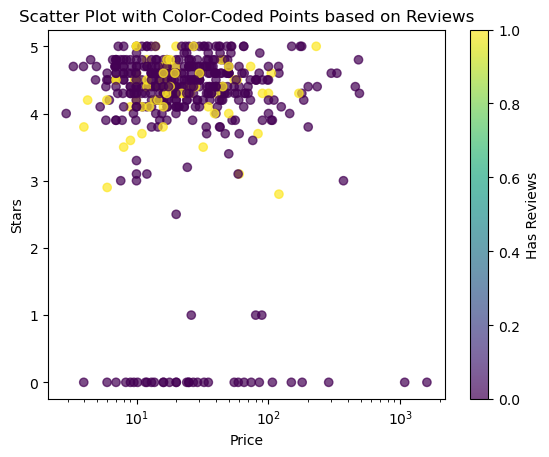

In [16]:
raw_df["has_reviews"] = raw_df["reviews"].apply(lambda x: 1 if x > 1 else 0)

# Sample 500 data points
sampled_df = raw_df.sample(n=500, random_state=2023)

plt.scatter(sampled_df['price'], sampled_df['stars'], c=sampled_df['has_reviews'], cmap='viridis', alpha=0.7)
plt.xscale('log')  
plt.xlabel('Price')
plt.ylabel('Stars')
plt.title('Scatter Plot with Color-Coded Points based on Reviews')


cbar = plt.colorbar()
cbar.set_label('Has Reviews')
plt.show()



In [17]:
category_counts = raw_df['category'].value_counts().to_dict()

# Create a new DataFrame 'categories' from the dictionary
categories = pd.DataFrame(list(category_counts.items()), columns=['category', 'count'])

# Print or inspect the 'categories' DataFrame
print(categories)


                                           category  count
0                               Games & Accessories  32449
1                                   Girls' Clothing  28688
2                                      Toys & Games  27624
3                            Consoles & Accessories  25295
4                                    Boys' Clothing  24971
..                                              ...    ...
231  Smart Home Thermostats - Compatibility Checker    131
232                    Smart Home: Vacuums and Mops    127
233                   Smart Home: New Smart Devices     95
234                     Smart Home: Lawn and Garden     79
235           Smart Home: Voice Assistants and Hubs     51

[236 rows x 2 columns]


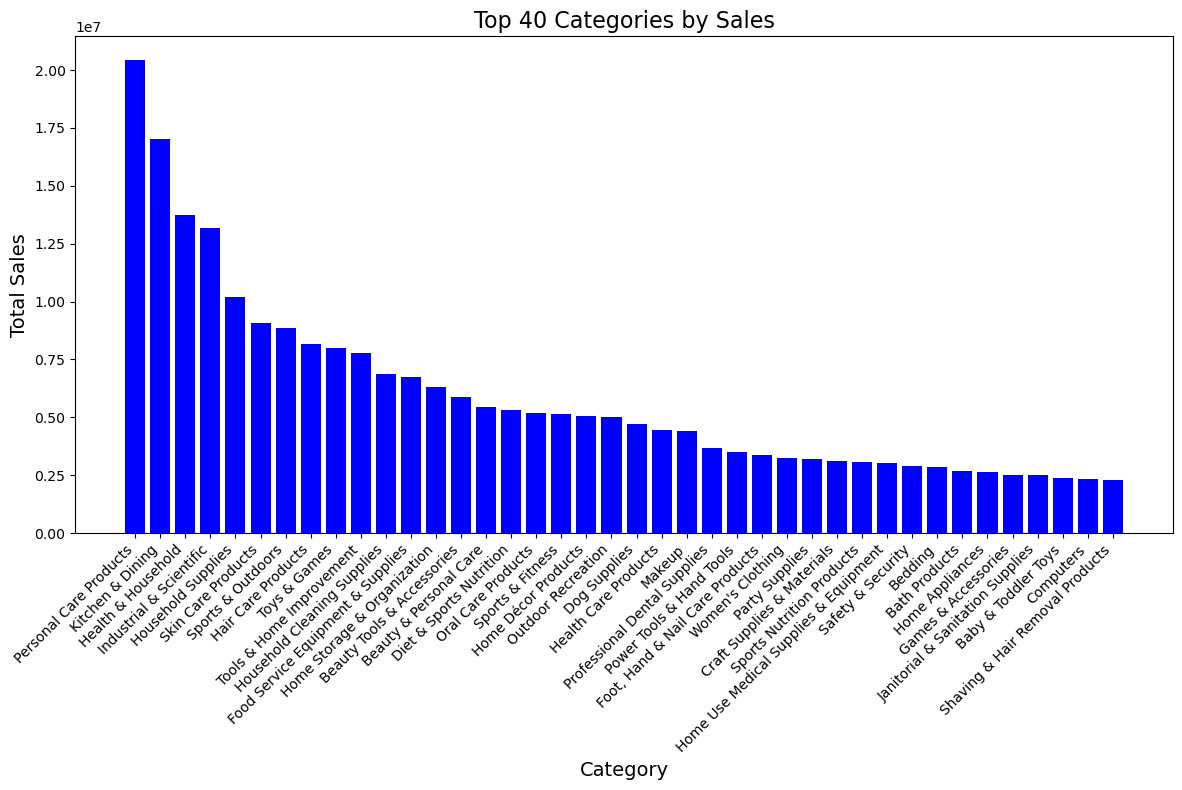

In [18]:

top_categories_df = raw_df[['category', 'boughtInLastMonth']].groupby(by=['category']).sum().reset_index().sort_values(by='boughtInLastMonth', ascending=False).head(n=40)


plt.figure(figsize=(12, 8))
plt.bar(top_categories_df['category'], top_categories_df['boughtInLastMonth'], color='blue')
plt.xlabel('Category',fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Top 40 Categories by Sales', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  
plt.show()


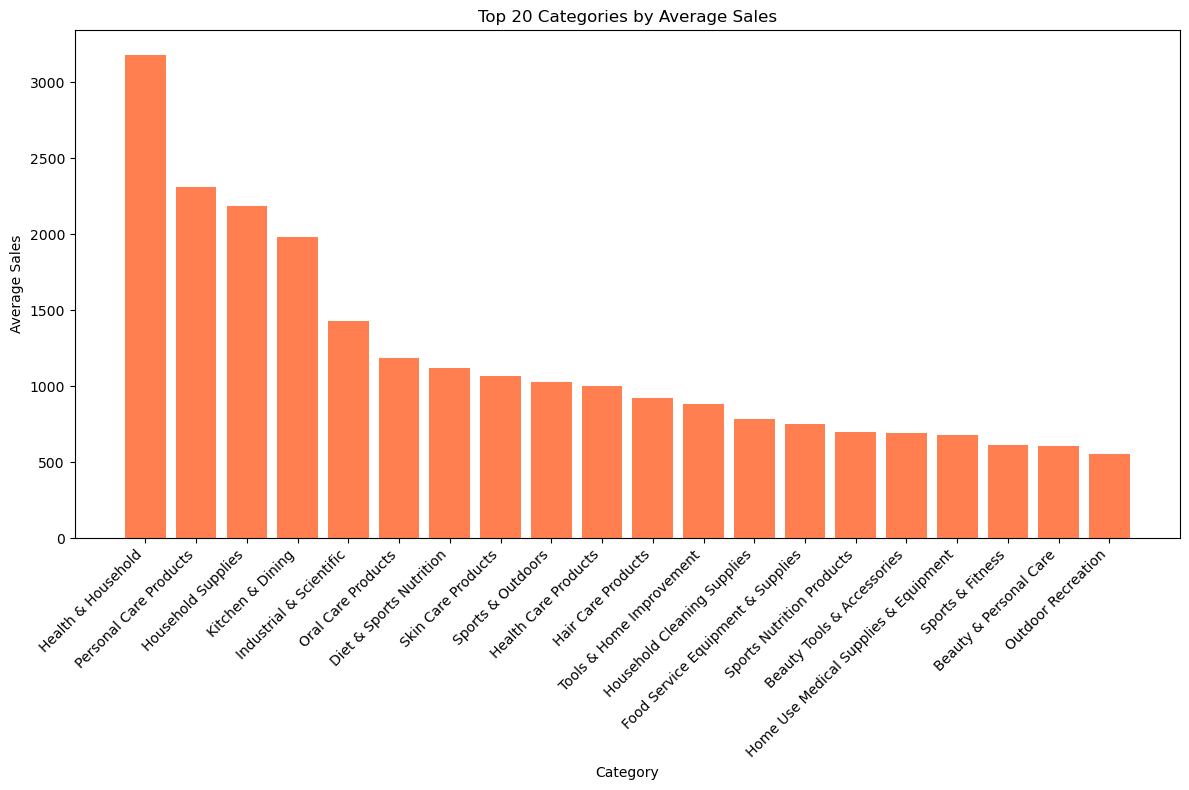

In [19]:

average_sales_by_category = raw_df.groupby('category')['boughtInLastMonth'].mean().reset_index()


top_n_categories = 20  
top_categories = average_sales_by_category.sort_values(by='boughtInLastMonth', ascending=False).head(top_n_categories)


plt.figure(figsize=(12, 8))
plt.bar(top_categories['category'], top_categories['boughtInLastMonth'], color='coral')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.title(f'Top {top_n_categories} Categories by Average Sales')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()



In [23]:
df.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'category',
       'isBestSeller', 'boughtInLastMonth', 'has_reviews', 'estimated_sales',
       'estimated_revenue'],
      dtype='object')

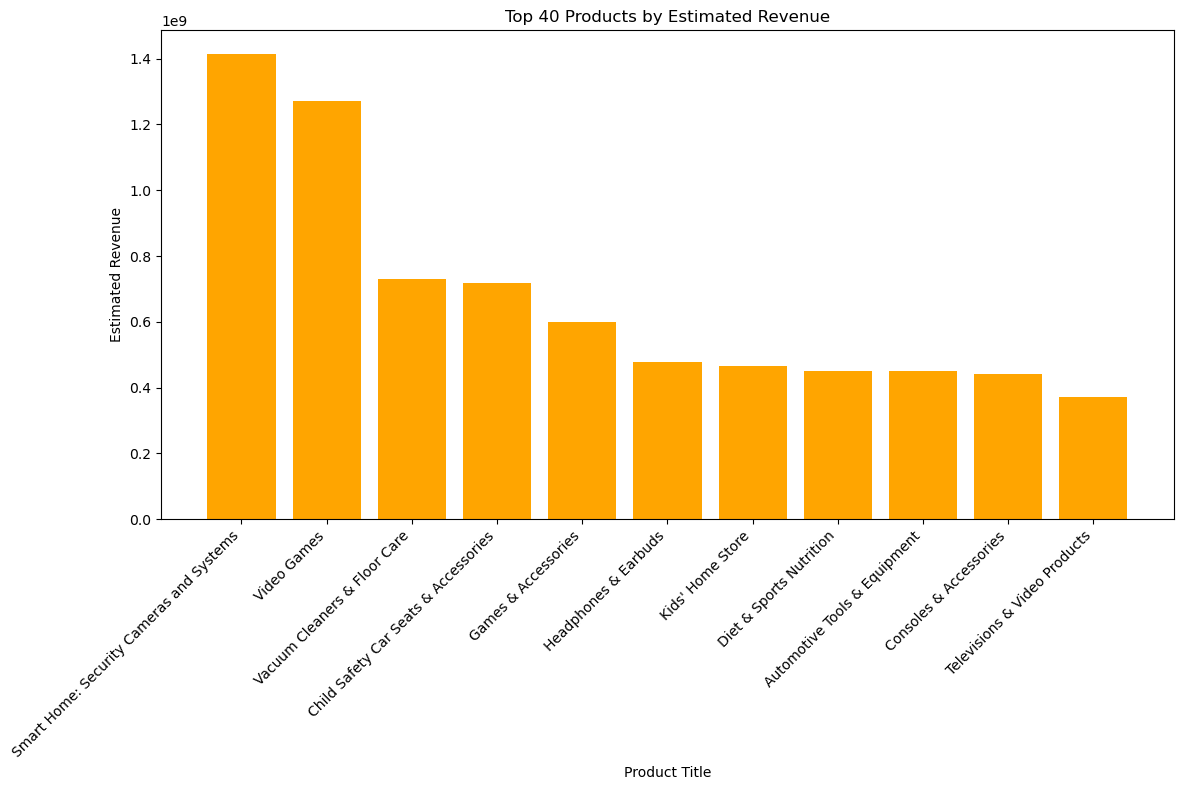

In [22]:

df = raw_df.copy()

# Creating a new column 'estimated_sales' by multiplying the number of reviews by 50
df['estimated_sales'] = df['reviews'] * 50


df['estimated_revenue'] = df['estimated_sales'] * df['price']


top_n_products = 40
top_products = df.sort_values(by='estimated_revenue', ascending=False).head(top_n_products)



plt.figure(figsize=(12, 8))
plt.bar(top_products['category'], top_products['estimated_revenue'], color='orange')
plt.xlabel('Product Title')
plt.ylabel('Estimated Revenue')
plt.title(f'Top {top_n_products} Products by Estimated Revenue')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  # Ensure that labels and ticks do not overlap
plt.show()


Summary:
The raw_df dataFrame has 1735414 rows and , 8 columns.
There was no outlier to be concerned about.
There are 236 different categories (need to reduced?)
There was only one row with a null value for "title" which was kept in the dataframe.



In [ ]:
#do wordcloud , add a new column, reduce the categories to 10